# Stability-test of tadpole schemes in the THDM-II

This notebook compares the THDM-II prediction for $\lambda_{hhh}$
for two different choices of tadpole renormalisation schemes:
i) with OS tadpoles (tOS) ii) with $\overline{\rm MS}$-tadpoles (Fleisher-Jegerlehner) treatment.

Scheme ii) is known to suffer from numerical instabilities.
In this example, however, we show that the instabilities
only affect the $\lambda_{hhh}$ prediction for very large 
BSM scales (i.e. long after decoupling).

### Import anyBSM and all required packages for scanning/plotting

In [1]:
from anyBSM import anyBSM
import anyBSM.plotting as plotting
import matplotlib
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np

### Load the THDM UFO model and show the used tadpole schemes

In [2]:
THDM = anyBSM('THDMII', quiet = True, progress = False)

In [3]:
# show the two renormalization schemes for full OS renormalisation if Sin(Beta-Alpha)==1: 
schemes=THDM.list_renormalization_schemes()

In [4]:
pprint(schemes['OSalignment'], sort_dicts=False) #  FS-MS scheme

{'description': '$\\overline{\\mathrm{MS}}$ mixing angles and OS masses i.e. '
                'fully on-shell $\\lambda_{hhh}$ for $\\sin '
                '{\\beta-\\alpha}=1$',
 'SM_names': {'Higgs-Boson': 'h1'},
 'VEV_counterterm': 'OS',
 'mass_counterterms': {'h1': 'OS', 'h2': 'OS'}}


In [48]:
pprint(schemes['OSalignmentadpoles'], width=100, sort_dicts=False) #tOS scheme

{'description': 'include h-tadpole via OS counterterm rather than non-PI diagrams; for SinBmA=1 '
                'this yields the same as the "OSalignment" scheme',
 'mass_counterterms': {'h1': 'OS'},
 'VEV_counterterm': 'OS',
 'tadpoles': False,
 'custom_CT_hhh': "dTad = Tadpole('h1') \nself.custom_CT_hhh = f'-3*({dTad})/(vSM**2)'\n"}


In [6]:
# go into the alignment limit
THDM.setparameters({'SinBmA': 1})

### In the decoupling regime: calculate $\lambda_{hhh}$ in both schemes and compare

In [29]:
npoints = 100 # decrease for testing, set to 100 for nice plot
def lamhhhTHDM(M,delta):
    mPhi = np.sqrt(M**2+delta**2)
    # M = np.sqrt(mPhi**2-delta**2)
    THDM.setparameters(params={'Mh2':mPhi,'MAh2':mPhi,'MHm2':mPhi,'M':M})
    
    THDM.load_renormalization_scheme('OSalignment')
    lamOS = THDM.lambdahhh()['total'].real
    
    THDM.load_renormalization_scheme('OSalignmentadpoles')
    lamOStad = THDM.lambdahhh()['total'].real
    
    return (lamOS, lamOStad, 200*abs(lamOS-lamOStad)/(lamOS+lamOStad))

Mval = np.logspace(start=np.log10(10),stop=np.log10(1000000),num=npoints)
# Mval = np.linspace(start=100,stop=1000000,num=npoints)
lamTHDMval1=np.array([lamhhhTHDM(M,100) for M in Mval]).transpose()
lamTHDMval2=np.array([lamhhhTHDM(M,200) for M in Mval]).transpose()
lamTHDMval3=np.array([lamhhhTHDM(M,300) for M in Mval]).transpose()
lamTHDMval4=np.array([lamhhhTHDM(M,400) for M in Mval]).transpose()

lamSM = anyBSM('SM',quiet=True).lambdahhh()['total'].real

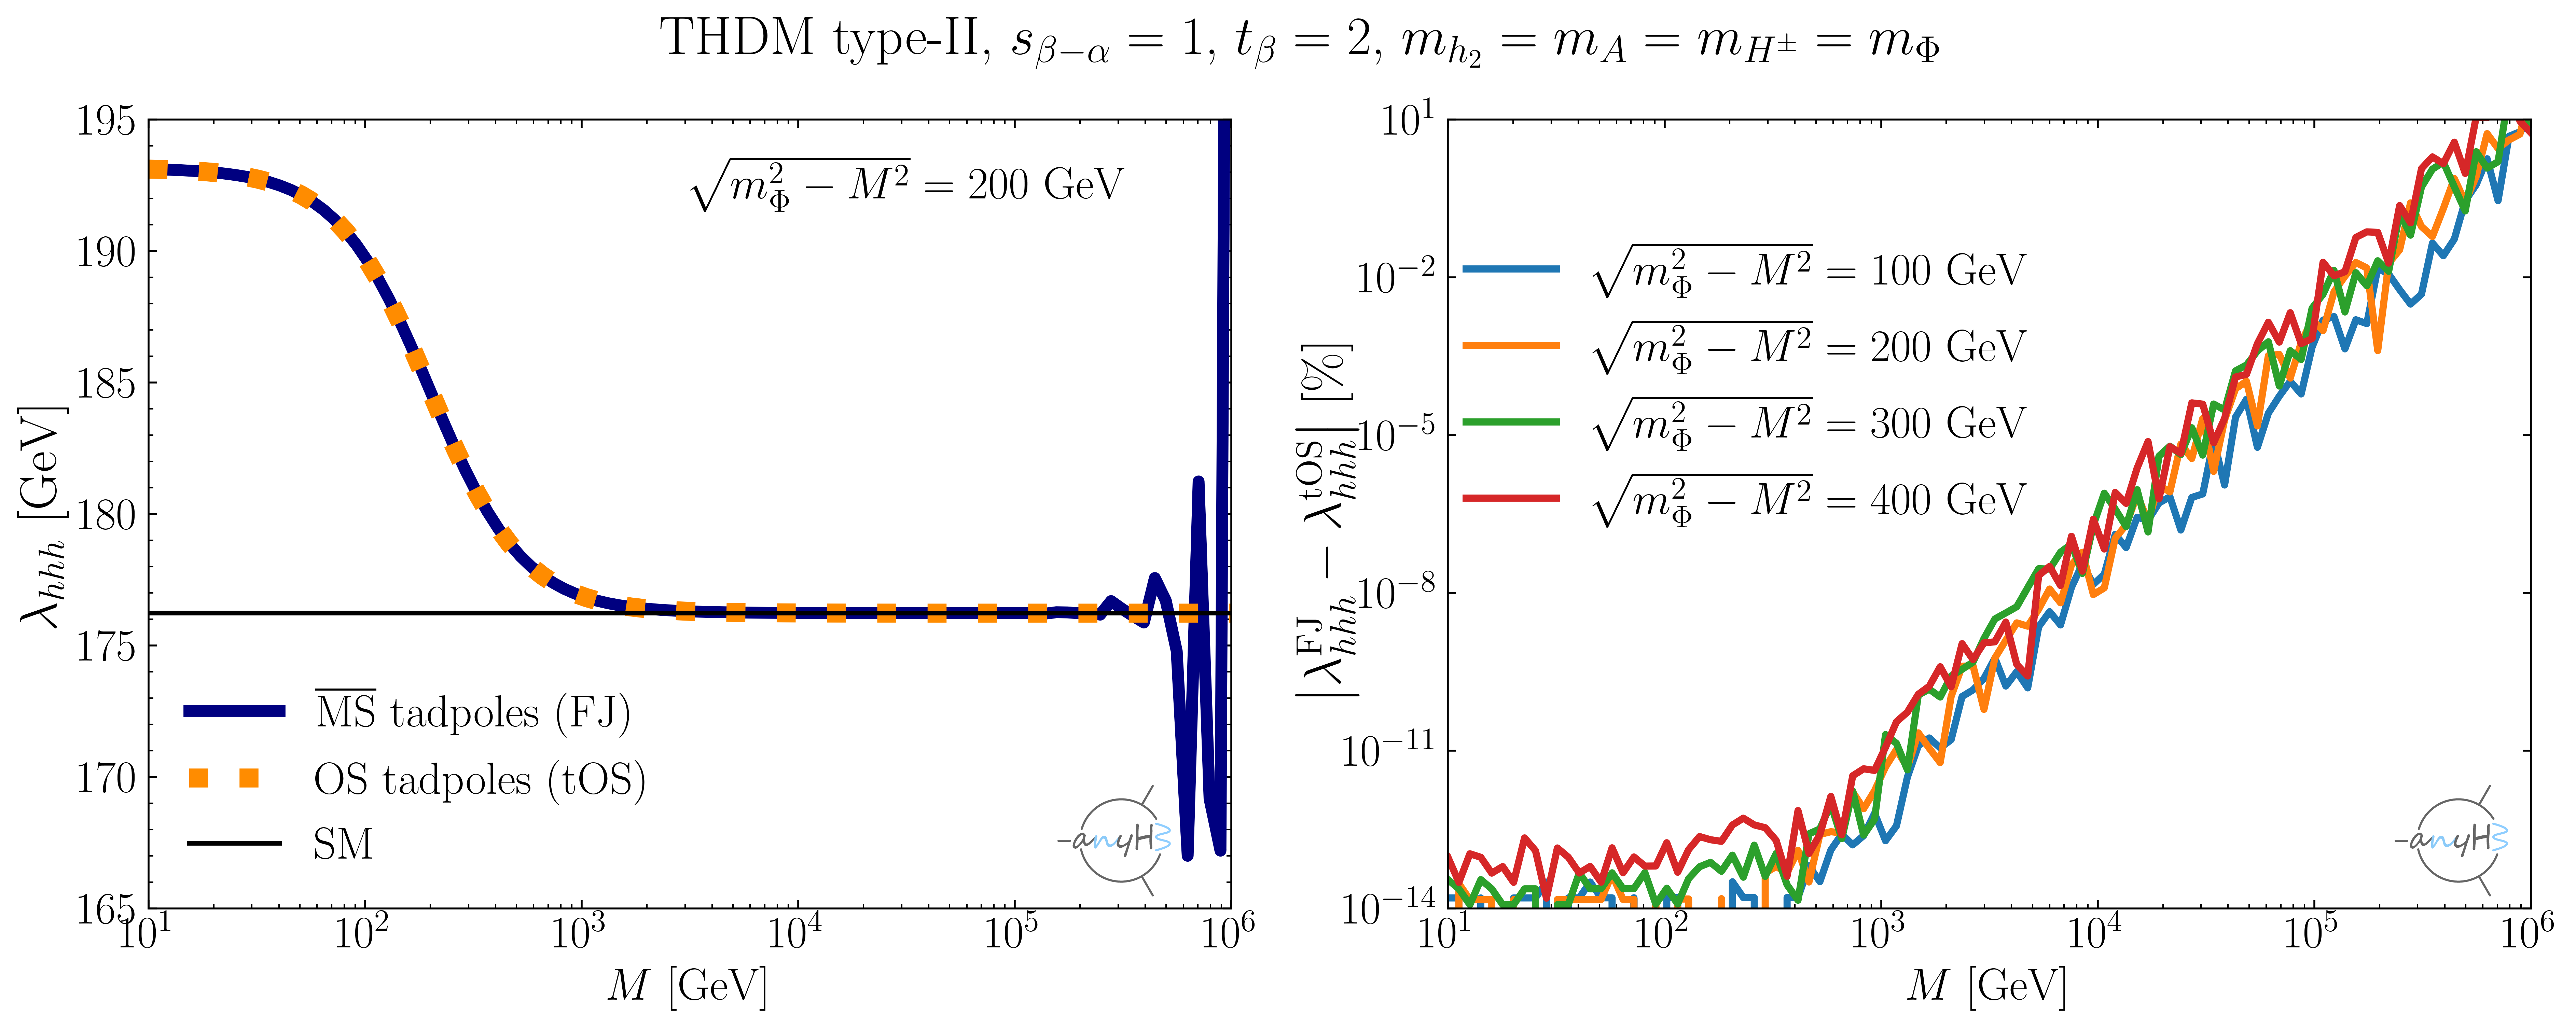

In [47]:
matplotlib.rcParams['font.size'] = 19
plotting.anyLogo['show']=False
fig, ax = plt.subplots(1,2,sharex=True,sharey=False,figsize=(18,6))
fig.dpi = 500
ax[0].plot(Mval, lamTHDMval2[0], lw=5, ls='-', color='navy', label=r'$\overline{\mathrm{MS}}$ tadpoles (FJ)')
ax[0].plot(Mval, lamTHDMval2[1], lw=8, ls=':', color='darkorange', label=r'OS tadpoles (tOS)')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[0].axhline(lamSM,ls='-', lw=2, color='black', label="SM")
ax[0].set_ylim([165,195])
ax[0].set_xlim([10,1000000])
ax[0].legend(frameon = False, loc = 'lower left')
ax[0].annotate(r'$\sqrt{m_\Phi^2-M^2}=200$ GeV',xy=(0.5,0.9),xycoords='axes fraction',)
ax[0].set_xlabel('$M$ [GeV]')
ax[0].set_ylabel(r'$\lambda_{hhh}$ [GeV]', fontsize=22)
ax[1].plot(Mval, lamTHDMval1[2], lw=3, label=r'$\sqrt{m_\Phi^2-M^2}=100$ GeV')
ax[1].plot(Mval, lamTHDMval2[2], lw=3, label=r'$\sqrt{m_\Phi^2-M^2}=200$ GeV')
ax[1].plot(Mval, lamTHDMval3[2], lw=3, label=r'$\sqrt{m_\Phi^2-M^2}=300$ GeV')
ax[1].plot(Mval, lamTHDMval4[2], lw=3, label=r'$\sqrt{m_\Phi^2-M^2}=400$ GeV')
ax[1].legend(frameon = False, loc=(0,0.46))
ax[1].set_ylim([10**-14,10])
ax[1].set_yscale('log')
ax[1].set_xlabel('$M$ [GeV]')
ax[1].set_ylabel(r'$\left|\lambda_{hhh}^{\mathrm{FJ}} - \lambda_{hhh}^{\mathrm{tOS}}\right|$ [\%]', labelpad=-7, fontsize=22)
plotting.place_logo(fig,0.34,0.12, alpha=0.6, logo_name='anyH3_logo_small.png')
plotting.place_logo(fig,0.775,0.12, alpha=0.6, logo_name='anyH3_logo_small.png')
fig.suptitle(r'THDM type-II, $s_{\beta-\alpha}=1$, $t_\beta=2$, $m_{h_2}=m_A=m_{H^\pm}=m_\Phi$')
fig.savefig('THDM_OStadpoles.pdf',bbox_inches="tight", dpi=fig.dpi)

### Conclusion: only for very heavy masses of ~10-100TeV the MS scheme is less numerical stable!